### How to read:
### [LSL (LabStreamingLayer)](https://labstreaminglayer.readthedocs.io/info/intro.html) and [XDF](https://github.com/sccn/xdf) recordings
#### An example with simultaneous streams from a [mobile EEG Android App](https://github.com/adrocampos/EEG-Droid) and a [Python script sending keyboard triggers](https://github.com/mvidaldp/pylsl-keyboard-trigger).

Dependencies for reading XDF

In [1]:
import pyxdf

Dependencies for calculations and plotting

In [2]:
import itertools

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Read file

In [3]:
data, header = pyxdf.load_xdf("eeg_plus_triggers.xdf")

How the header looks like

In [4]:
header

{'info': defaultdict(list, {'version': ['1.0']})}

How the recorded streams looks like

In [5]:
data

[{'info': defaultdict(list,
              {'name': ['KeyboardTriggers'],
               'type': ['Markers'],
               'channel_count': ['2'],
               'channel_format': ['float32'],
               'source_id': ['3a4dca8c-0efd-11eb-82d9-da25bd87aa5a'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['18657.16455691900'],
               'uid': ['3bd64861-0636-40e0-b74a-1c3d2ce4a2d6'],
               'session_id': ['default'],
               'hostname': ['velorum'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16573'],
               'v6service_port': ['16573'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 0}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['18692.426129456

The `data` part read from the file is an array/list of dictionaries. So, each dict represents a different stream. We recorded two streams. The first one is from the [keyboard-trigger.py](https://github.com/mvidaldp/pylsl-keyboard-trigger/blob/main/keyboard-trigger.py) Python script sending triggers via keyboard press. The second is from the [mobile EEG App](https://github.com/adrocampos/EEG-Droid) sending the measured EEG channel values of the Traumschreiber (mobile EEG) device.

The keys inside each dict (stream) are explained below.

On `info` there's the recorded stream/s information (name, type, data type, hostname, uid, sampling rate, etc.)

In [6]:
data[0]["info"]

defaultdict(list,
            {'name': ['KeyboardTriggers'],
             'type': ['Markers'],
             'channel_count': ['2'],
             'channel_format': ['float32'],
             'source_id': ['3a4dca8c-0efd-11eb-82d9-da25bd87aa5a'],
             'nominal_srate': ['0.000000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['18657.16455691900'],
             'uid': ['3bd64861-0636-40e0-b74a-1c3d2ce4a2d6'],
             'session_id': ['default'],
             'hostname': ['velorum'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16573'],
             'v6service_port': ['16573'],
             'desc': [None],
             'stream_id': 1,
             'effective_srate': 0})

In [7]:
data[1]["info"]

defaultdict(list,
            {'name': ['Traumschreiber-EEG'],
             'type': ['Markers'],
             'channel_count': ['24'],
             'channel_format': ['float32'],
             'source_id': ['37f209f1-9aab-4a41-b386-56387bc4b937'],
             'nominal_srate': ['0.000000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['63077.37698702900'],
             'uid': ['a7dff592-222c-4aba-93b2-6bf809f139ba'],
             'session_id': ['default'],
             'hostname': ['localhost'],
             'v4address': [None],
             'v4data_port': ['16574'],
             'v4service_port': ['16574'],
             'v6address': [None],
             'v6data_port': ['16575'],
             'v6service_port': ['16575'],
             'desc': [None],
             'stream_id': 2,
             'effective_srate': 0})

On `footer` there's the timing information of the recorded stream/s (first and last timestamps, sample count, etc.)

In [8]:
data[0]["footer"]

{'info': defaultdict(list,
             {'first_timestamp': ['18692.426129456'],
              'last_timestamp': ['18713.67744727'],
              'sample_count': ['9'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['18693.872479023'],
                                          'value': ['7.184999049059115e-06']}),
                             defaultdict(list,
                                         {'time': ['18698.872561483'],
                                          'value': ['-7.589002052554861e-06']}),
                             defaultdict(list,
                                         {'time': ['18703.872660776'],
                                          'value': ['-2.577400118752848e-05']}),
                             defaultdict(list,
                                         {'time': ['18708.872784644'],
                                          'value': ['-3.

In [9]:
data[1]["footer"]

{'info': defaultdict(list,
             {'first_timestamp': ['63151.218883251'],
              'last_timestamp': ['63179.721298032'],
              'sample_count': ['7113'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['63156.8671146405'],
                                          'value': ['-44462.99462843849']}),
                             defaultdict(list,
                                         {'time': ['63161.8685086535'],
                                          'value': ['-44462.9959094835']}),
                             defaultdict(list,
                                         {'time': ['63166.867092952'],
                                          'value': ['-44462.99436651']}),
                             defaultdict(list,
                                         {'time': ['63171.86739596151'],
                                          'value': ['-44462.994

On `time_series` is where the information streamed is stored.

In this case, for the keyboard triggers these are the UNIX timestamps (index 0 of each sample) plus boolean values (index 1: eyes opened = 1.0, eyes closed = 0.0) sent from the Python script [keyboard-trigger.py](https://github.com/mvidaldp/pylsl-keyboard-trigger/blob/main/keyboard-trigger.py) at each key press event.

In [10]:
data[0]["time_series"]

array([[1.6027767e+09, 1.0000000e+00],
       [1.6027767e+09, 0.0000000e+00],
       [1.6027767e+09, 1.0000000e+00],
       [1.6027767e+09, 0.0000000e+00],
       [1.6027767e+09, 1.0000000e+00],
       [1.6027767e+09, 0.0000000e+00],
       [1.6027767e+09, 1.0000000e+00],
       [1.6027767e+09, 0.0000000e+00],
       [1.6027767e+09, 1.0000000e+00],
       [1.6027767e+09, 0.0000000e+00]], dtype=float32)

In [11]:
data[1]["time_series"]

array([[ 0.10281  , -1.566884 ,  0.578716 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.107876 , -1.5701619,  0.577226 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.09834  , -1.579102 ,  0.585868 , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.103108 , -1.566586 ,  0.59153  , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.088506 , -1.572248 ,  0.587656 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.090592 , -1.57046  ,  0.570968 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

On `time_stamps` is where the synchronized timestamps across all the streams are stored. It's time in seconds also but they are not UNIX epochs.

In [12]:
data[0]["time_stamps"]

array([18692.42612579, 18695.09653543, 18697.36005416, 18699.68524659,
       18702.18734364, 18704.60320733, 18706.81185163, 18709.12982383,
       18711.39721317, 18713.67742424])

In [13]:
data[1]["time_stamps"]

array([18688.22422918, 18688.22649997, 18688.227458  , ...,
       18716.71308079, 18716.72445876, 18716.72677289])

To visualize the data first we correct the timestamps so that they start at 0. Then we arrange each EEG channel values into a list to plot them as lines. And finally we plot the red (eyes closed = 0.0) or green (eyes opened = 1.0) vertical lines that represent our triggers.

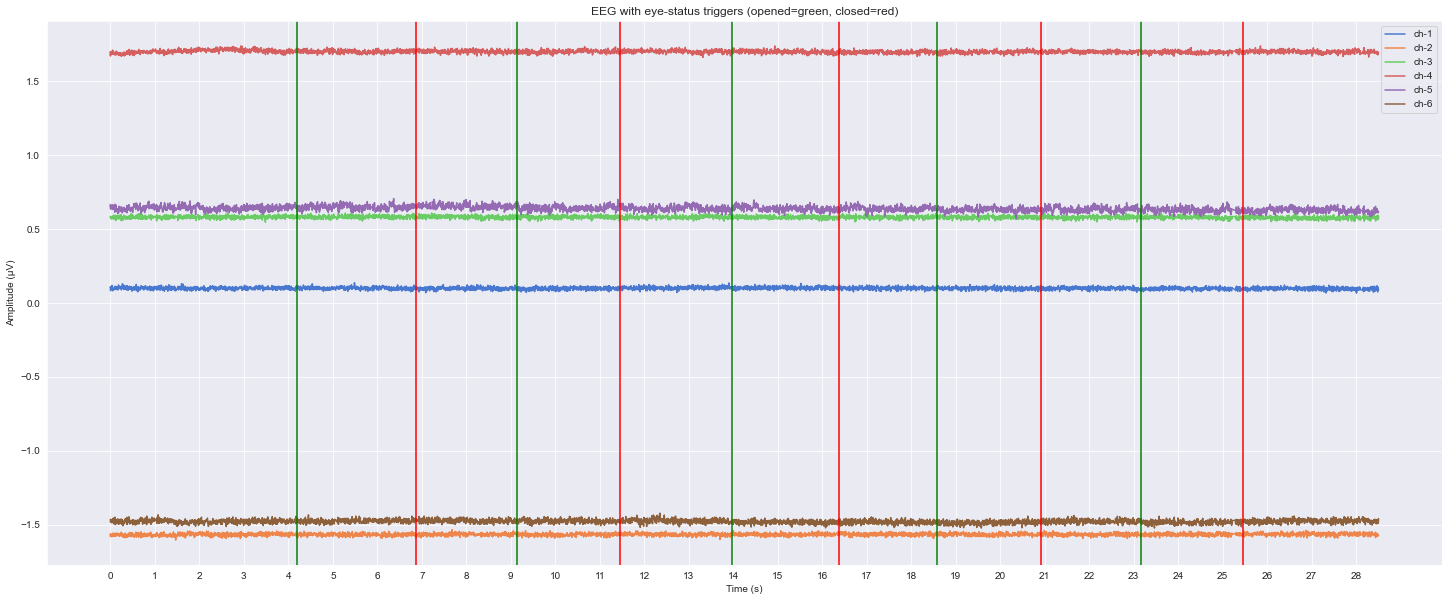

In [14]:
# calculate time values from 0
def correct_timestamps(ts):
    corrected = [0]
    length = len(ts)
    [corrected.append(ts[i + 1] - ts[0]) for i in range(length) if i < length - 1]
    return np.array(corrected)


# rewrite time starting at 0
triggers_time = data[0]["time_stamps"]
eeg_time = data[1]["time_stamps"]

t_first = triggers_time[0]
e_first = eeg_time[0]
time_diff = t_first - e_first

triggers_time = correct_timestamps(triggers_time)
eeg_time = correct_timestamps(eeg_time)

# recorrect with the difference
if time_diff < 0:
    eeg_time = np.array([i + abs(time_diff) for i in eeg_time])
else:
    triggers_time = np.array([i + time_diff for i in triggers_time])

# prepare dict for the eeg channels
eeg = {f"ch-{ch + 1}": [] for ch in range(int(data[1]["info"]["channel_count"][0]))}

# each EEG channel as a list
for sample in data[1]["time_series"]:
    for ch, value in enumerate(sample):
        eeg[f"ch-{ch + 1}"].append(value)

# prepare list for the eyes state triggers
triggers = []
# on index 0 we have the python-generated UNIX epoch
# on index 1 we have 0.0 for closed and 1.0 for opened
triggers = [sample[1] for sample in data[0]["time_series"]]

# PLOT
%matplotlib inline
sns.set_style("darkgrid")  # set seaborn plotting style
palette = itertools.cycle(sns.color_palette(palette="muted"))
plt.figure(figsize=(25, 10))
plt.title("EEG with eye-status triggers (opened=green, closed=red)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")

# each EEG channel values as a line
for i, ch in enumerate(eeg):
    if i < 6:  # all channels of this recording (6)
        sns.lineplot(x=eeg_time, y=eeg[ch], color=next(palette), label=ch)

colors = ["red", "green"]
# each trigger as a vertical line
for i, trigger in enumerate(triggers_time):
    label = "eyes-closed" if triggers[i] == 0.0 else "eyes-open"
    color = colors[0] if triggers[i] == 0.0 else colors[1]
    plt.axvline(trigger, label=label, color=color)

plt.xticks(np.arange(0, eeg_time[-1], 1))
plt.savefig("recording_visualization.png")
plt.show()

For more in-depth examples about how to read LSL recordings from XDF files, plots, and so on, check:
- https://github.com/mvidaldp/lsl_latency_analysis/blob/master/analysis.ipynb
- https://github.com/mvidaldp/lsl_latency_analysis/blob/master/analysis_2.ipynb
